<a href="https://colab.research.google.com/github/NagumalliSowmika/First_ML_Project/blob/master/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project:Marketing Campaign for Banking Products**
The marketing department planned campaigns with better target marketing to increase the success rate with minimum budget.The department wants to build a model that will help them identify the potential customers who have a higher probability of purchasing the loan.This will increase the success ratio while at the same time reduce the cost of campaign.

# DataSet:
The file Bank.csv contains data on 5000 customers. The data include customer
demographic information (age, income, etc.), the customer's relationship with the bank
(mortgage, securities account, etc.), and the customer response to the last personal
loan campaign (Personal Loan).
The management built a new product.Personal Loan, and ran a small campiagn towards selling new product to their clients.After sometime,9% of customers have personal 
loan from the bank.

#The Goal:
-> To sell more Personal Loan products to Bank customers.

-> To devise campiagn to better target marketing to increase the success ratio with minimal budget.

->To identify the potential customers who have a higher probability of purchasing the loan.


# Some Basics Steps and tasks: 
1. Import the datasets and libraries, check datatype, statistical summary, shape, null
values etc
2. Check if you need to clean the data for any of the variables
3. EDA: Study the data distribution in each attribute and target variable, share your findings.

● Number of unique in each column?

● Number of people with zero mortgage?

● Number of people with zero credit card spending per month?

● Value counts of all categorical columns.

● Univariate and Bivariate analysis

4. Apply necessary transformations for the feature variables
5. Normalise your data and split the data into training and test set in the ratio of 70:30
respectively
6. Use the Logistic Regression model to predict the likelihood of a customer buying
personal loans.
7. Print all the metrics related for evaluating the model performance
8. Build various other classification algorithms and compare their performance
9. Give a business understanding of your model

**Attribute Information:**

● ID: Customer ID

● Age: Customer's age in completed years

● Experience: #years of professional experience

● Income: Annual income of the customer ($000)

● ZIP Code: Home Address ZIP code.

● Family: Family size of the customer

● CCAvg: Avg. spending on credit cards per month ($000)

● Education: Education Level.

1: Undergrad;

2: Graduate;

3: Advanced/Professional

● Mortgage: Value of house mortgage if any. ($000)

● Personal Loan: Did this customer accept the personal loan offered in the last campaign?

● Securities Account: Does the customer have a securities account with the bank?

● CD Account: Does the customer have a certificate of deposit (CD) account with the bank?

● Online: Does the customer use internet banking facilities?

● Credit card: Does the customer use a credit card issued by the bank?

# 1.Importing the required libraries
1. importing libraries for checking datatype, statistical summary, shape, null values etc

2. to clean up the noise of the data

3. for Classification Algorithms

4. for Confusion Matrix

5. for Classification reports

and more.

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#sklearn
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import PowerTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
#MLPClassfier
from sklearn.neural_network import MLPClassifier
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**INSPECTING DATA**

**reading csv file**

In [2]:
df=pd.read_csv('Bank_Loan_Modelling.csv')

**head()**method is used to return top n (5 by default) rows of a data frame or series.

In [3]:
#To display first 10 rows
df.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


**tail()** function returns last n rows from the object based on position.


In [4]:
df.tail(10) #to display bottom 10 rows

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4990,4991,55,25,58,95023,4,2.00,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.90,2,100,0,0,0,0,1
4992,4993,30,5,13,90037,4,0.50,3,0,0,0,0,0,0
4993,4994,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.00,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80,1,0,0,0,0,1,1


**describe()** is used to view some basic statistical details like count, mean, std, min, max etc. of a data frame or a series of numeric values.

In [5]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


**OBSERVATION :** describe()

1. We observe experience is below 0, experience cannot be negative 

2. Zip code is related to area,and also it contains random values, hence ignoring it for now

3. People with higher income takes Personal Loan but people with lower income does not take loan.

4. Data of personal loan is overlaped wrt to most variables.


In [6]:
df.info() #To display datatype of each column and also display the non-null rows for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
df.shape #shape of data

(5000, 14)

In [8]:
#checking datatypes
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [9]:
df.isnull().sum() #display null values present in each column

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [10]:
(df['Experience']<0).sum()#values below zero

52

we have found 52 values below 0, this is an error



We got negative values in Experience column in our data set so we need to clean this, we are replacing the negative values with the median.

In [11]:
mdn = int(df['Experience'].median()) #This will calculate median of column Experience
for i in range(len(df)):
    if df['Experience'].iloc[i] < 0:
        df['Experience'].iloc[i] = mdn

In [12]:
df['Experience'].describe()

count    5000.000000
mean       20.327600
std        11.253035
min         0.000000
25%        11.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

-> corr(), Find the pairwise correlation of all columns in the dataframe. Any NAN values are automatically excluded and,for any non-numeric data type columns in the dataframe it is ignored.

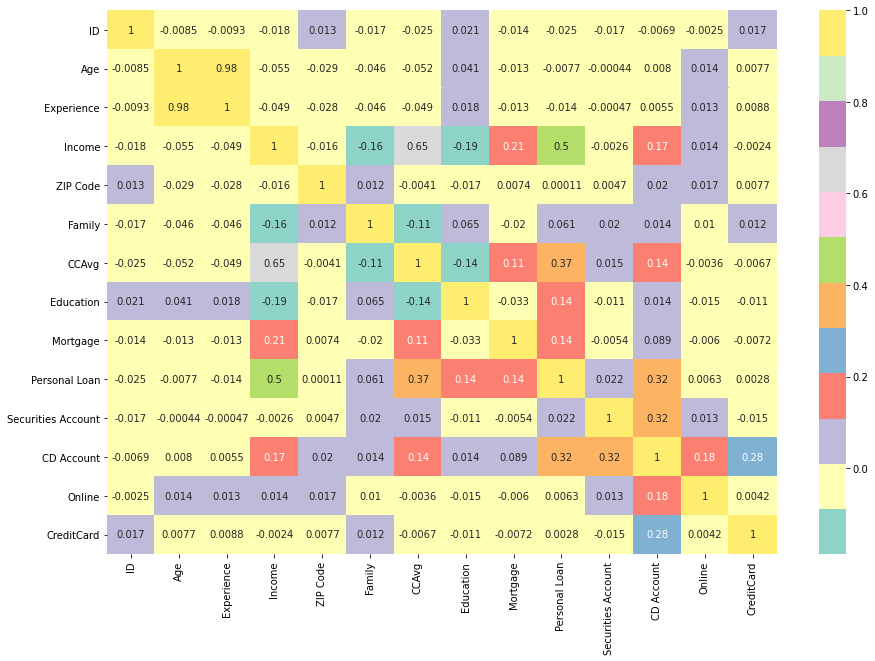

In [13]:
bank_corr=df.corr()
plt.subplots(figsize =(15, 10)) 
sns.heatmap(bank_corr,cmap="Set3",annot=True)

**OBSERVATION :**

We found that, 'Age' and 'Experience' are highly co-related, So, we can drop any of the variable.


also, there is almost Negligible relation between Personal loan and ZIP Code.

and, 'CCAvg' and 'Income' also have high correlation

In [14]:
df.drop(['ID','Experience'], axis=1,inplace=True) #axis=1 represents column
df.describe()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


# EDA

**Unique values in each column**

In [15]:
#prints unique values in each column
uniqueValues = df.nunique()
print('Count of unique values in each column :')
print(uniqueValues)

Count of unique values in each column :
Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64


 **People with zero mortgage**

In [16]:
(df['Mortgage']==0).sum()

3462

**OBSERVATION :**

The number of people with zero mortgage are 3462, that means majority of people don’t have mortgage

**Number of people spending with zero credit card per month**

In [17]:
(df['CCAvg']==0).sum()

106

**OBSERVATION :**

Number of people with zero credit card spending per month is 106, that means thousands of people use their credit card for making transactions per month

**VALUES COUNT OF ALL CATRGORICAL DATA**

A Categorical variable is a variable that can take on one of a limited, and usually fixed, number of possible values.

In [18]:
df.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [19]:
df.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [20]:
df['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [21]:
df.Online.value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [22]:
df.CreditCard.value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

GROUPING BASED ON Personal Loan, i.e., MEAN,MEDIAN

In [23]:
df.groupby(['Personal Loan']).agg(['mean','median'])

Age             Income  ... Online CreditCard       
                    mean median        mean  ... median       mean median
Personal Loan                                ...                         
0              45.367257     45   66.237389  ...      1   0.293584      0
1              45.066667     45  144.745833  ...      1   0.297917      0

[2 rows x 22 columns]

GROUPING BASED ON Personal Loan i.e., MAX, MIN

In [24]:
df.groupby(['Personal Loan']).agg(['min','max'])

Age     Income      ZIP Code  ... CD Account Online     CreditCard    
              min max    min  max      min  ...        max    min max        min max
Personal Loan                               ...                                     
0              23  67      8  224     9307  ...          1      0   1          0   1
1              26  65     60  203    90016  ...          1      0   1          0   1

[2 rows x 22 columns]

In [25]:
df.describe()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


**UNIVARIATE :**

Univariate basically tells us how data in each feature is distributed and also tells us about central tendencies like mean, median, and mode.

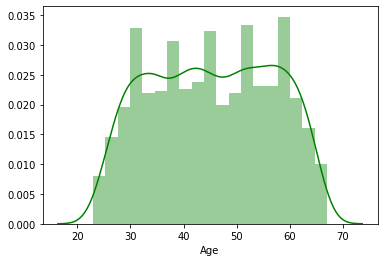

In [26]:
sns.distplot( df['Age'], color = 'g')

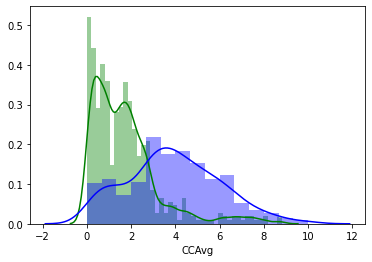

In [28]:
sns.distplot( df[df['Personal Loan'] == 0]['CCAvg'], color = 'g')
sns.distplot( df[df['Personal Loan']==1]['CCAvg'], color = 'b')

**OBSERVATION :**

Customers who took Personal Loan also have high CCAvg but who don't have Personal Loan don't have good CCAvg, conclusion is that, the person who have good CCAvg can take Personal Loan, and can can be a targated coustomer

**and also, this data is Right Skewed So, we need to Normalise the data;**


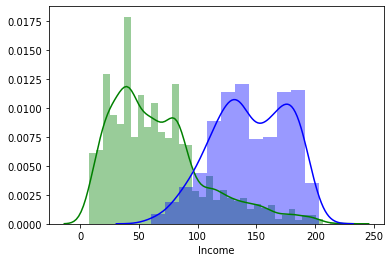

In [29]:
sns.distplot( df[df['Personal Loan'] == 0]['Income'], color = 'g')
sns.distplot( df[df['Personal Loan'] == 1]['Income'], color = 'b')

**OBSERVATION :**

Customers who took Personal Loan have high Income, and who don't took Personal Loan don't have high Income

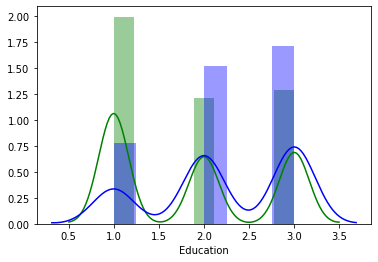

In [30]:
sns.distplot( df[df['Personal Loan'] == 0]['Education'], color = 'g')
sns.distplot( df[df['Personal Loan'] == 1]['Education'], color = 'b')

**OBSERVATION :**

At all Education levels people have took Personal Loan

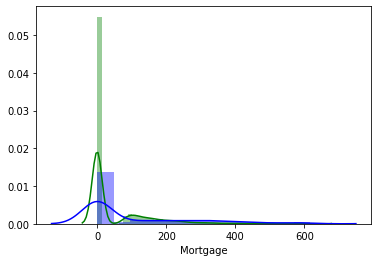

In [31]:
sns.distplot( df[df['Personal Loan'] == 0]['Mortgage'], color = 'g')
sns.distplot( df[df['Personal Loan']==1]['Mortgage'], color = 'b')

**OBSERVATION :**
Customers who did not take personal loan Have a very low mortgage but who did take loan have very high mortgage

**and, the data is Right Skewed**

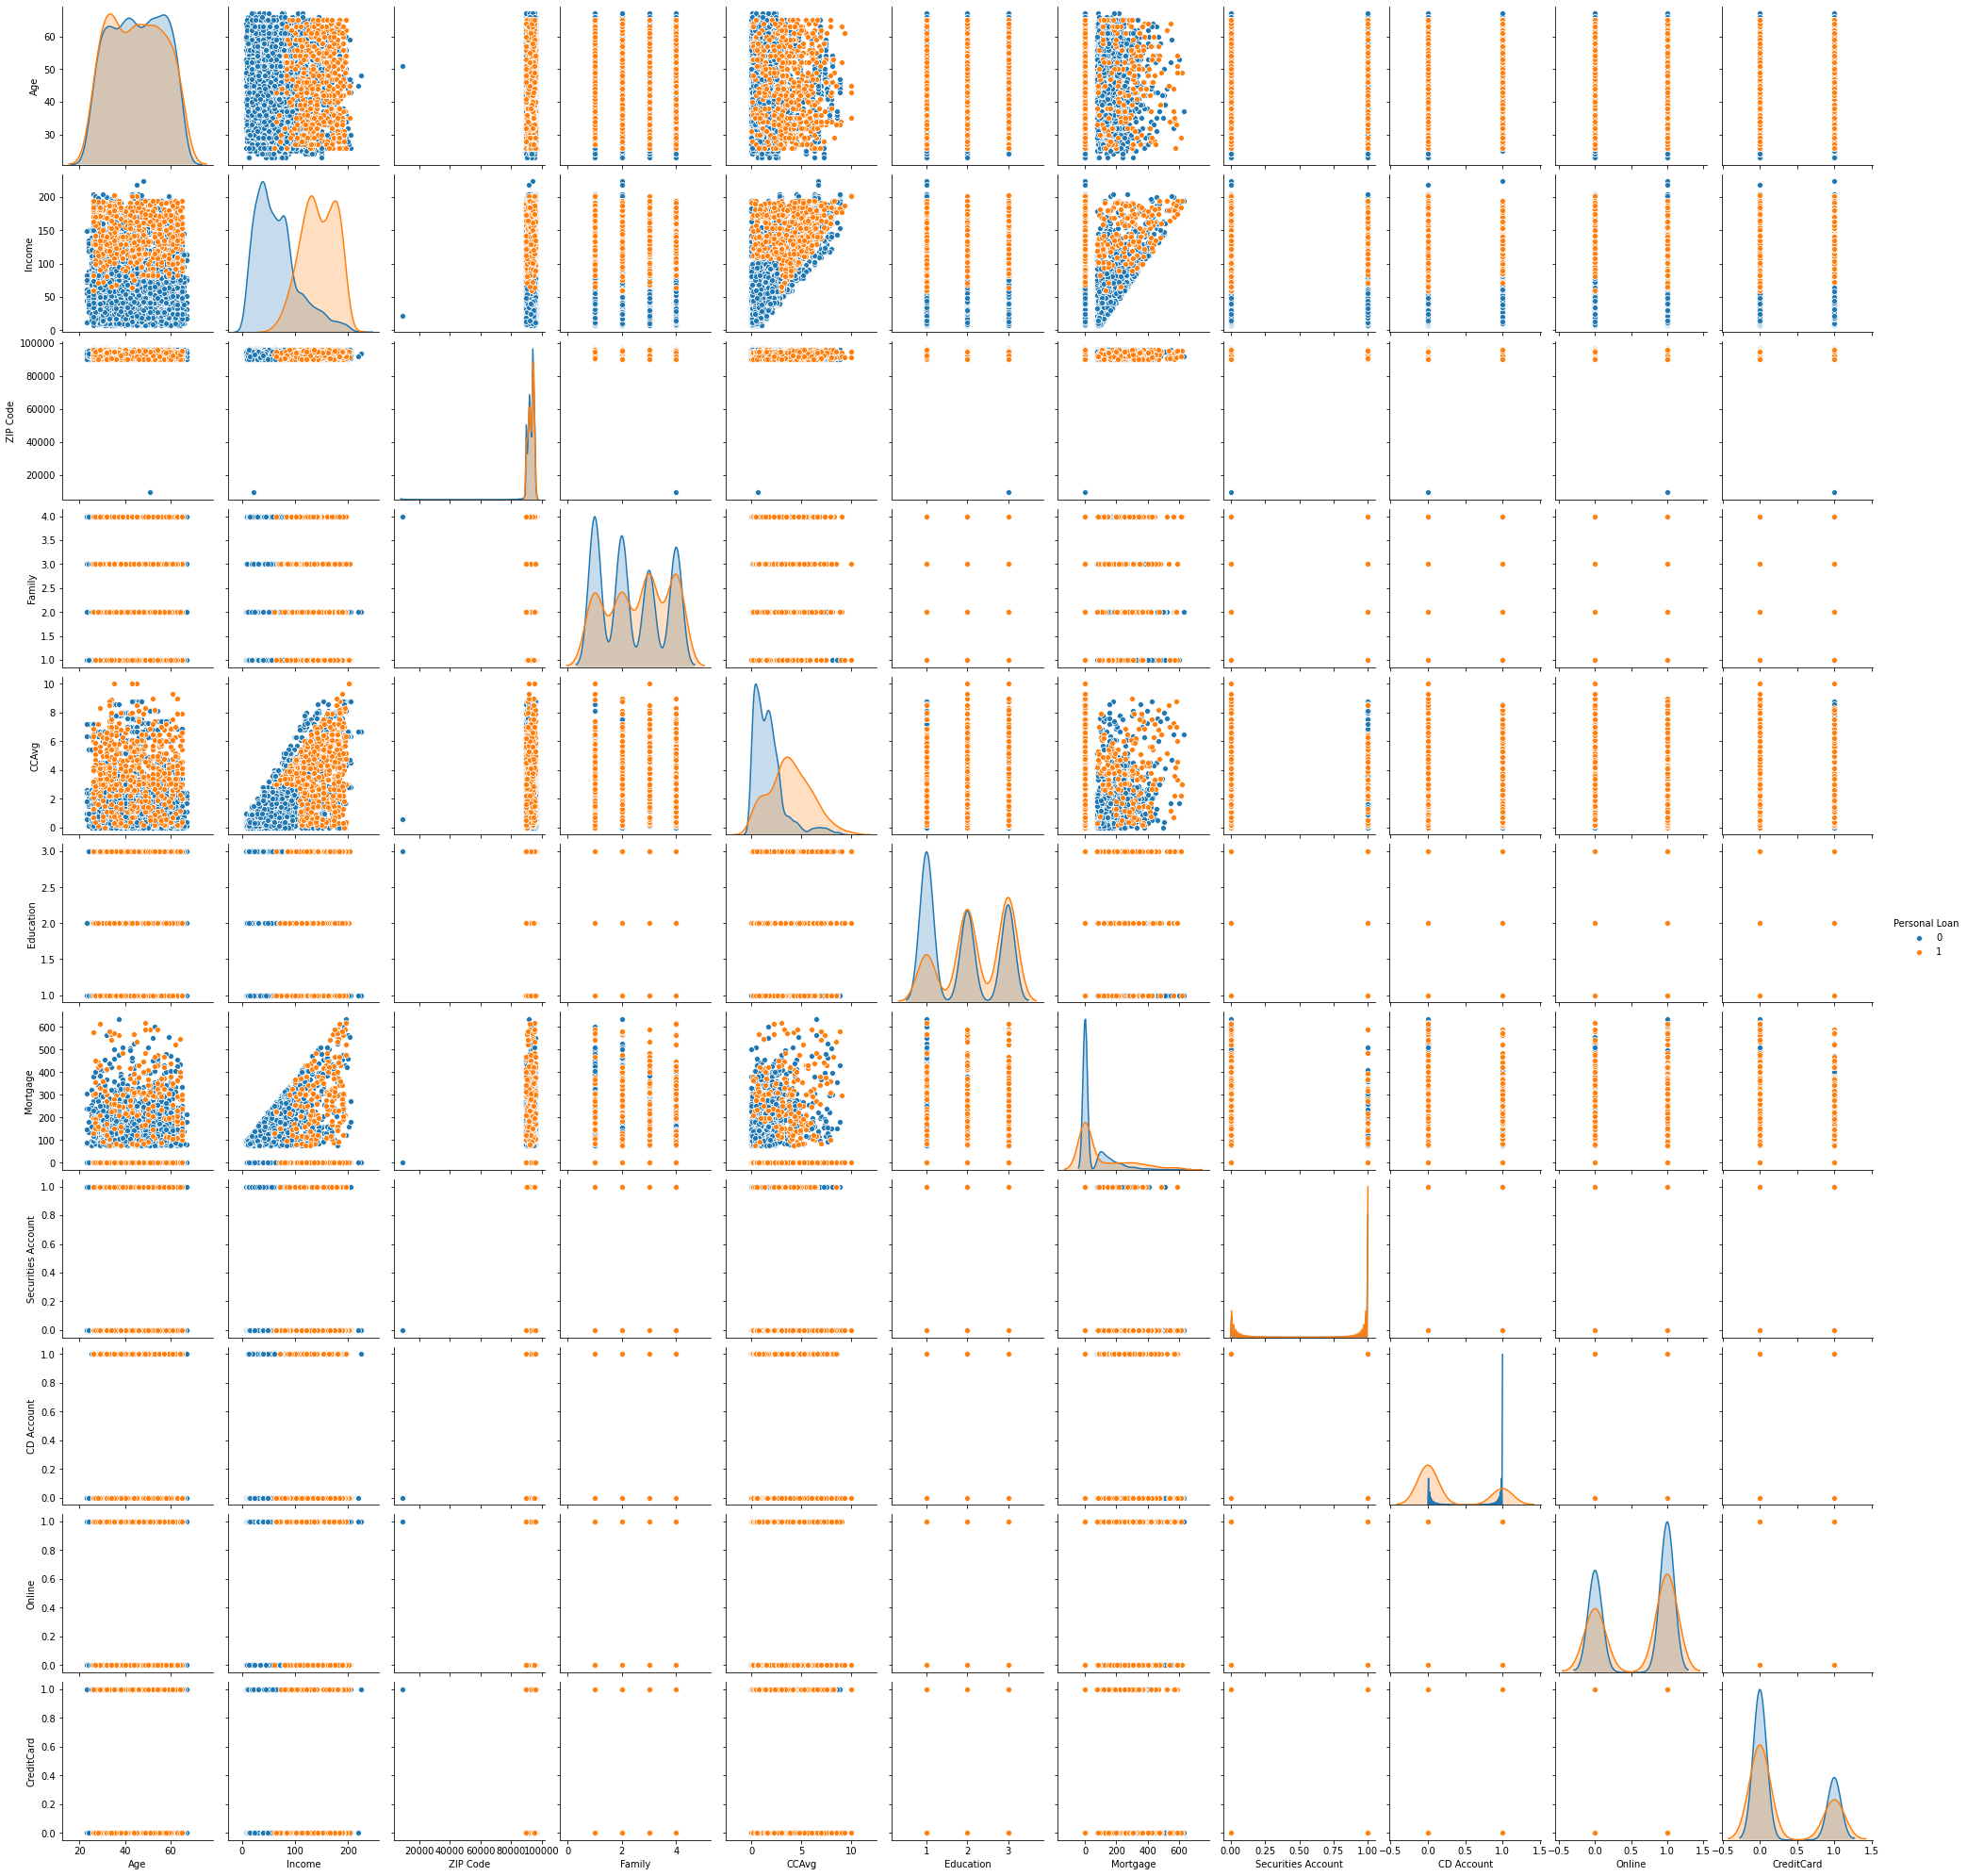

In [32]:
sns.pairplot(df,diag_kind='auto',hue='Personal Loan')

**BIVARIATE**

Bivariate analysis is one of the simplest forms of quantitative analysis. It involves the analysis of two variables, for the purpose of determining the empirical relationship between them. Bivariate analysis can be helpful in testing simple hypotheses of association.

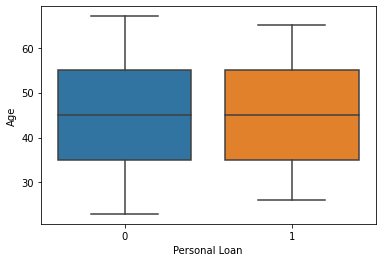

In [33]:
sns.boxplot(x='Personal Loan',y='Age',data=df)

**OBSERVATION :**

Age does not impact much to the chance of a person who take personal loan 

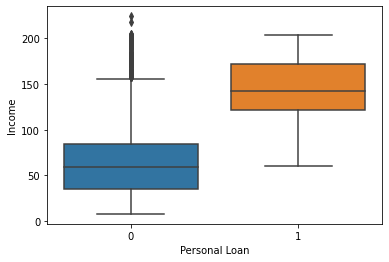

In [34]:
sns.boxplot(x='Personal Loan',y='Income',data=df)

**OBSERVATION :**

Person with higher Income take more Personal Loan, But person with lower income does not take Personal Loan

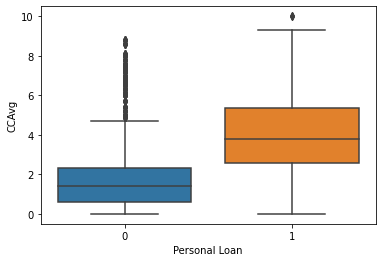

In [36]:
sns.boxplot(x='Personal Loan',y='CCAvg',data=df)

**OBSERVATION :**

Person with higher CCAvg(credit card spending per month) take more Personal Loan, But person with lower CCAvg does not take Personal Loan

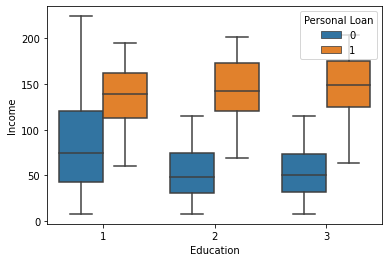

In [37]:
sns.boxplot(x="Education", y="Income", hue="Personal Loan", data=df)

**OBSERVATION :**

Person with  education level 1 have higher incomes. But customers took personal loans have the same income distribution regardless of the education level.



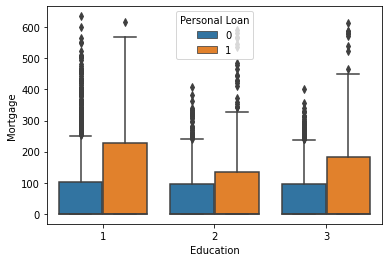

In [38]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=df)

**OBSERVATION :**

Person who have Personal Loan have more mortgages


In [39]:
loan_zipcode = df[df['Personal Loan']==1]['ZIP Code'].value_counts().head(10)
loan_zipcode

94720    19
94305    13
92093     9
90095     8
90089     8
94304     8
92182     7
94022     6
95051     6
95616     6
Name: ZIP Code, dtype: int64

**OBSERVATION :**

These are the top 10 locations from where the coustomers previously applied for Personal Loan

In [40]:
data_x=df.loc[:,df.columns !='Personal Loan']
data_y=df[['Personal Loan']]

**TRANSFORMATIONS FOR FEATURE VARIABLES**

As shown in UNIVARIATE graph above, that we got the right skewed data, so we had to transform it to the Normal distribution.
We are using "yeo-johnson" from PowerTransformer 

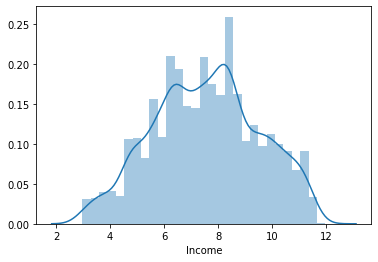

In [41]:
power_t=PowerTransformer(method="yeo-johnson", standardize=False)
power_t.fit(data_x['Income'].values.reshape(-1,1))

data_x['Income']=power_t.transform(data_x.Income.values.reshape(-1,1))
sns.distplot(data_x['Income']);

**OBSERVATION :**

Unlike before now the data is in Normal distribution

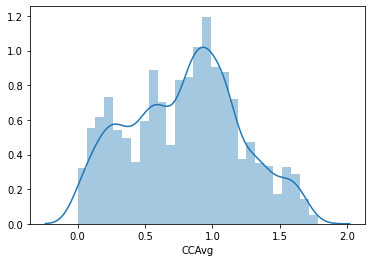

In [42]:
power_t=PowerTransformer(method="yeo-johnson", standardize=False)
power_t.fit(data_x['CCAvg'].values.reshape(-1,1))

data_x['CCAvg']=power_t.transform(data_x.CCAvg.values.reshape(-1,1))
sns.distplot(data_x['CCAvg']);

We have decided to drop 'ZIP Code' column as it is not contribution in our program because it is just random values, and considered as noisy data, So, droping it, is a good idea.

In [43]:
data_x.drop(['ZIP Code'], axis=1,inplace=True) #axis=1 represents column
data_x.describe()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,7.561003,2.396400,0.795825,1.881000,56.498800,0.104400,0.06040,0.596800,0.294000
std,11.463166,1.961533,1.147663,0.413304,0.839869,101.713802,0.305809,0.23825,0.490589,0.455637
min,23.000000,2.972350,1.000000,-0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,6.222469,1.000000,0.495350,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,7.585900,2.000000,0.814478,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,8.916412,3.000000,1.067713,3.000000,101.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,11.976488,4.000000,1.779775,3.000000,635.000000,1.000000,1.00000,1.000000,1.000000


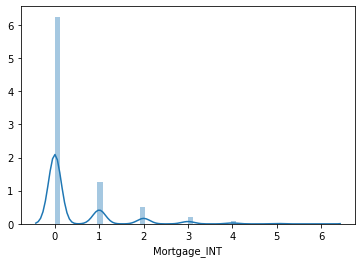

In [44]:
data_x['Mortgage_INT']=pd.cut(data_x['Mortgage'],
                                   bins=[0,100,200,300,400,500,600,700],
                                   labels=[0,1,2,3,4,5,6],include_lowest=True)
data_x.drop('Mortgage',axis=1,inplace=True)
sns.distplot(data_x['Mortgage_INT']);

we have used binning in Mortgage to normalise Mortgage data.

**BINNING method** : 

Binning method is used to smoothing data or to handle noisy data. In this method, the data is first sorted and then the sorted values are distributed into a number of buckets or bins. As binning methods consult the neighborhood of values, they perform local smoothing.

In [45]:
data_x.head()

,Age,Income,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_INT
0,25,6.827583,4,0.845160,1,1,0,0,0,0
1,45,5.876952,3,0.814478,1,1,0,0,0,0
2,39,3.504287,1,0.633777,1,0,0,0,0,0
3,35,8.983393,1,1.107427,2,0,0,0,0,0
4,35,6.597314,4,0.633777,2,0,0,0,1,0


**SPLITING DATA INTO TRAINING SET AND TEST SET IN 70:30 RATIO RESPECTIVELY**

In [46]:
train_x,test_x,train_y,test_y = train_test_split(data_x,data_y,test_size=0.3,stratify=data_y,random_state=0)

**SHAPE OF TEST SET AND TRAINING SET**

In [47]:
print(train_x.shape,test_x.shape,train_y.shape,test_y.shape)

(3500, 10) (1500, 10) (3500, 1) (1500, 1)


In [48]:
train_x.head()

,Age,Income,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_INT
3789,51,5.058173,3,0.322049,1,0,0,1,1,0
758,64,5.948841,1,0.814478,2,1,0,0,0,0
2868,52,5.651776,4,0.902279,1,0,0,1,1,0
2550,32,4.661500,1,0.384645,3,0,0,1,0,1
2150,62,7.097040,1,0.544710,1,1,0,0,1,0


**USING DIFFERENT ALGORITHM TO CLASSIFY, WHICH ALGORITHM IS GIVING US THE BEST ACCURACY FOR OUR DATA SET**

reset_index() : Pandas reset_index() is a method to reset index of a Data Frame. reset_index() method sets a list of integer ranging from 0 to length of data as index.

In [49]:
train_x.reset_index(drop=True, inplace=True)
test_x.reset_index(drop=True, inplace=True)
train_y.reset_index(drop=True, inplace=True)
test_y.reset_index(drop=True, inplace=True)

In [50]:
from sklearn.preprocessing import StandardScaler
for ind, column in enumerate (train_x.columns):
  scaler = StandardScaler()

  #fit to train data 
  scaler.fit(train_x[[column]])

  #transform train data
  np_array = scaler.transform(train_x[[column]])
  train_x.loc[:, column] = pd.Series(np_array.flatten())

  #transform test data
  np_array = scaler.transform(test_x[[column]])
  test_x.loc[:, column] = pd.Series(np_array.flatten())

**Converting dataframes to numpy arrays**

In [51]:
np_train_x=train_x.values
np_train_y=train_y.values
np_test_x=test_x.values
np_test_y=test_y.values

In [52]:
np_test_y.shape

(1500, 1)

**Different Classifiers**

In [53]:
classifier_1 = LogisticRegression(random_state=0)
classifier_2 = DecisionTreeClassifier(random_state=0, max_depth=8)
classifier_3 = RandomForestClassifier(random_state=0, n_estimators=500,max_depth=8)
classifier_4 = KNeighborsClassifier(n_neighbors= 21 , weights = 'uniform', metric='euclidean')
classifier_5 = GaussianNB()
classifier_6 = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)

**Confusion Matrix**

In [54]:
def draw_cm(actual, predicted):
  cm = confusion_matrix(actual, predicted) 
  sns.heatmap(cm, annot=True, fmt='.2f', xticklabels = [0,1], yticklabels = [0,1] ) 
  plt.ylabel("Observed") 
  plt.xlabel("Predicted") 
  plt.show()

**Logistic Regression** : 

Logistic Regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary). Like all regression analyses, the logistic regression is a predictive analysis. Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables. Sometimes logistic regressions are difficult to interpret; the Intellectus Statistics tool easily allows you to conduct the analysis, then in plain English interprets the output.

In [55]:
# fit classifier_1
classifier_1.fit(np_train_x, np_train_y.ravel())
pred_1_test_x = classifier_1.predict(np_test_x)
pred_1_train_x = classifier_1.predict(np_train_x)
accuracy_score_1_train_x=accuracy_score(np_train_y,pred_1_train_x)
accuracy_score_1_test_x=accuracy_score(np_test_y,pred_1_test_x)

print("Accuracy for train data : {:.4f} ".format(accuracy_score_1_train_x))
print("Accuracy for test data : {:.4f} ".format(accuracy_score_1_test_x))

Accuracy for train data : 0.9569 
Accuracy for test data : 0.9547 


Confusion Matrix : 


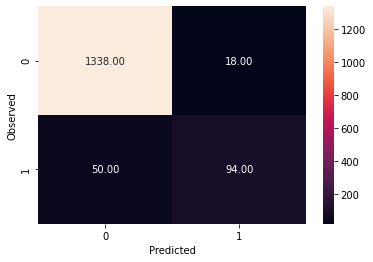

None


In [56]:
print("Confusion Matrix : ")
print(draw_cm(np_test_y,pred_1_test_x.reshape(-1,1)))

In [57]:
print("Mean Absolute Error : ", metrics.mean_absolute_error(np_test_y,pred_1_test_x))
print("R2 Score : ",metrics.r2_score(np_test_y,pred_1_test_x))

Mean Absolute Error :  0.04533333333333334
R2 Score :  0.477630285152409


Classification Report :

In [58]:
print(classification_report(np_test_y,pred_1_test_x))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1356
           1       0.84      0.65      0.73       144

    accuracy                           0.95      1500
   macro avg       0.90      0.82      0.85      1500
weighted avg       0.95      0.95      0.95      1500



**OBSERVATION** : 

In Logistic Regression, the Accuracy score is 95%, which is quite satisfying as this is the first model we have applied, for our data frame.



**Decision Tree** : 

A Decision Tree is a flowchart-like structure in which each internal node represents a test on a feature (e.g. whether a coin flip comes up heads or tails) , each leaf node represents a class label (decision taken after computing all features) and branches represent conjunctions of features that lead to those class labels. The paths from root to leaf represent classification rules.

In [59]:
# fit classifier_2
classifier_2.fit(np_train_x, np_train_y.ravel())
pred_2_test_x = classifier_2.predict(np_test_x)
pred_2_train_x = classifier_2.predict(np_train_x)
accuracy_score_2_train_x=accuracy_score(np_train_y,pred_2_train_x)
accuracy_score_2_test_x=accuracy_score(np_test_y,pred_2_test_x)

print("Accuracy for train data : {:.4f} ".format(accuracy_score_2_train_x))
print("Accuracy for test data : {:.4f} ".format(accuracy_score_2_test_x))

Accuracy for train data : 0.9957 
Accuracy for test data : 0.9813 


Graphical Representation of Decision Tree

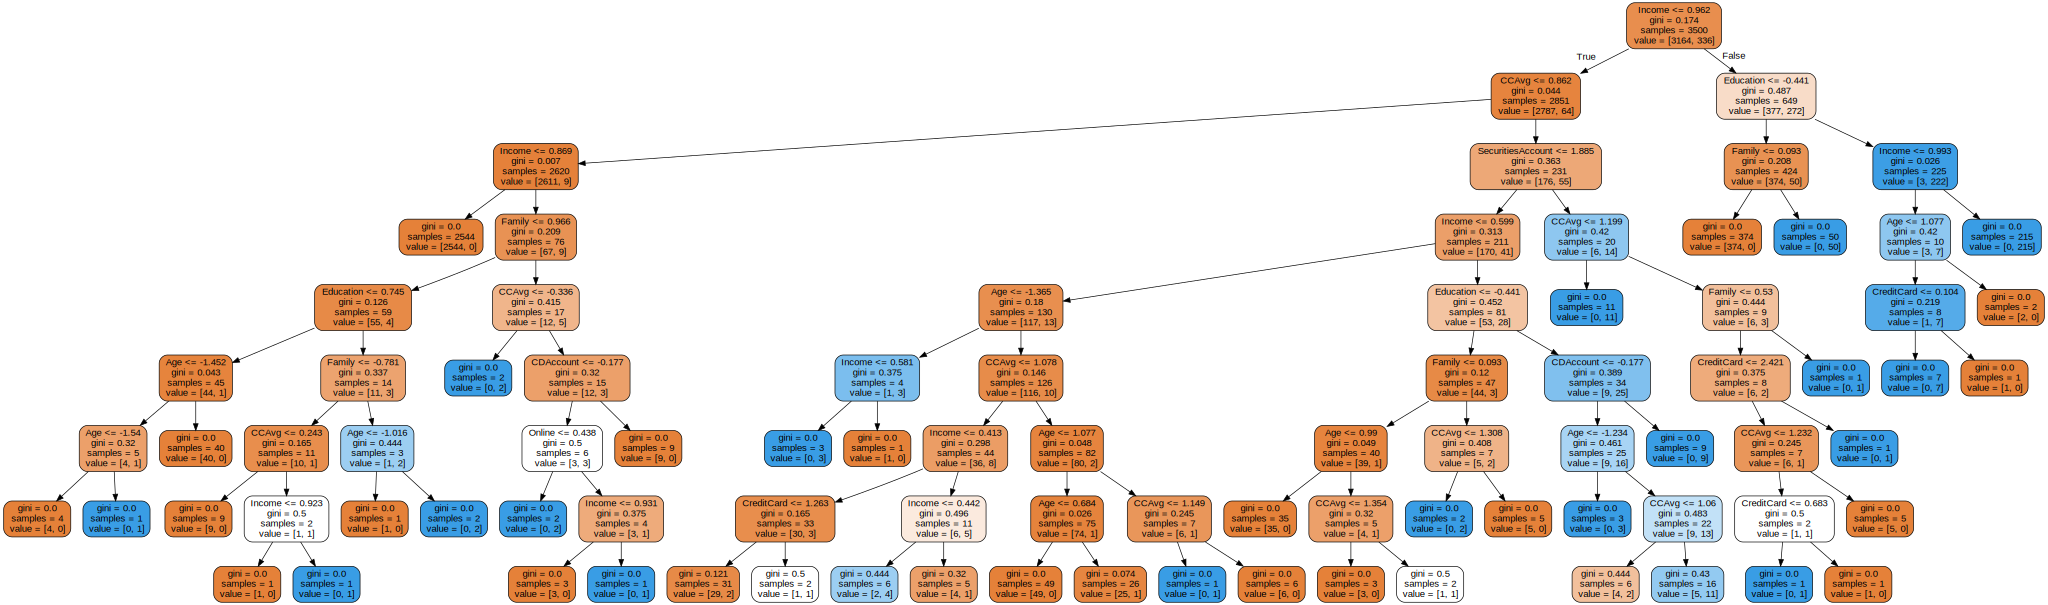

In [60]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(classifier_2,out_file=None,feature_names=["Age","Income","Family","CCAvg","Education","Mortgage_INT",
                                                                          "SecuritiesAccount","CDAccount",
                                                                          "Online","CreditCard"],filled=True,rounded=True)
graph=graphviz.Source(dot_data)
graph

Confusion Matrix for classifier_2

Confusion Matrix : 


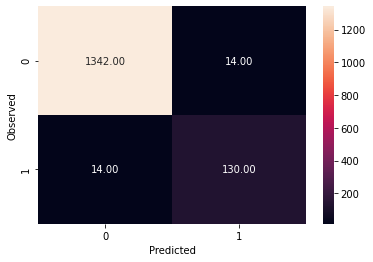

None


In [61]:
print("Confusion Matrix : ")
print(draw_cm(np_test_y,pred_2_test_x))

**OBSERVATION** : 

In Logistic Regression, the Accuracy score is 95%, which is quite satisfying as this is the first model we have applied, for our data frame.


**Decision Tree** : 

A Decision Tree is a flowchart-like structure in which each internal node represents a test on a feature (e.g. whether a coin flip comes up heads or tails) , each leaf node represents a class label (decision taken after computing all features) and branches represent conjunctions of features that lead to those class labels. The paths from root to leaf represent classification rules.

In [62]:
# fit classifier_2
classifier_2.fit(np_train_x, np_train_y.ravel())
pred_2_test_x = classifier_2.predict(np_test_x)
pred_2_train_x = classifier_2.predict(np_train_x)
accuracy_score_2_train_x=accuracy_score(np_train_y,pred_2_train_x)
accuracy_score_2_test_x=accuracy_score(np_test_y,pred_2_test_x)

print("Accuracy for train data : {:.4f} ".format(accuracy_score_2_train_x))
print("Accuracy for test data : {:.4f} ".format(accuracy_score_2_test_x))

Accuracy for train data : 0.9957 
Accuracy for test data : 0.9813 


Graphical Representation of decision tree

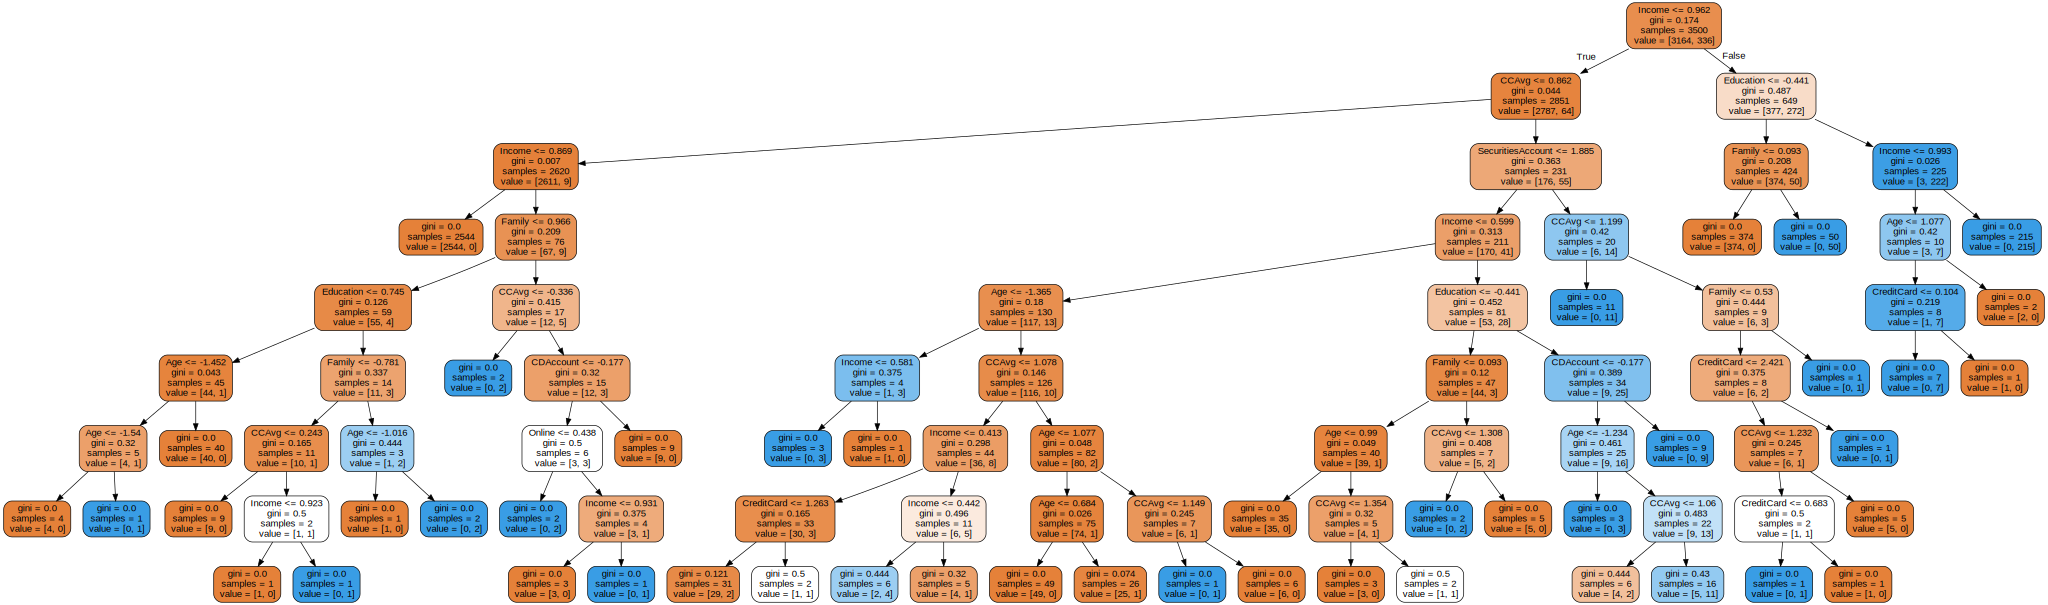

In [64]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(classifier_2,out_file=None,feature_names=["Age","Income","Family","CCAvg","Education","Mortgage_INT",
                                                                          "SecuritiesAccount","CDAccount",
                                                                          "Online","CreditCard"],filled=True,rounded=True)
graph=graphviz.Source(dot_data)
graph

Confusion Matrix for classifier_2

Confusion Matrix : 


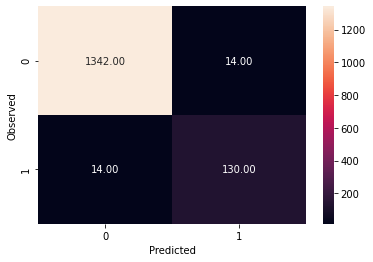

None


In [65]:
print("Confusion Matrix : ")
print(draw_cm(np_test_y,pred_2_test_x))

In [66]:
print("Mean Absolute Error : ", metrics.mean_absolute_error(np_test_y,pred_2_test_x))
print("R2 Score : ",metrics.r2_score(np_test_y,pred_2_test_x))

Mean Absolute Error :  0.018666666666666668
R2 Score :  0.7849065880039331


In [67]:
print(classification_report(np_test_y,pred_2_test_x))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.90      0.90      0.90       144

    accuracy                           0.98      1500
   macro avg       0.95      0.95      0.95      1500
weighted avg       0.98      0.98      0.98      1500



**OBSERVATION** :

In Decision Tree, we got the accuracy score of 98% which comes out to be the BEST TILL NOW.


**Random Forest** :

Random Forest is a flexible, easy to use machine learning algorithm that produces, even without hyper-parameter tuning, a great result most of the time. It is also one of the most used algorithms, because of its simplicity and diversity (it can be used for both classification and regression tasks).

In [68]:
# fit classifier_3
classifier_3.fit(np_train_x, np_train_y.ravel())
pred_3_test_x = classifier_3.predict(np_test_x)
pred_3_train_x = classifier_3.predict(np_train_x)
accuracy_score_3_train_x=accuracy_score(np_train_y,pred_3_train_x)
accuracy_score_3_test_x=accuracy_score(np_test_y,pred_3_test_x)

print("Accuracy for train data : {:.4f} ".format(accuracy_score_3_train_x))
print("Accuracy for test data : {:.4f} ".format(accuracy_score_3_test_x))

Accuracy for train data : 0.9949 
Accuracy for test data : 0.9873 


In [69]:
randomforest_model = RandomForestClassifier(max_depth=2, random_state=0)
randomforest_model.fit(np_train_x, np_train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

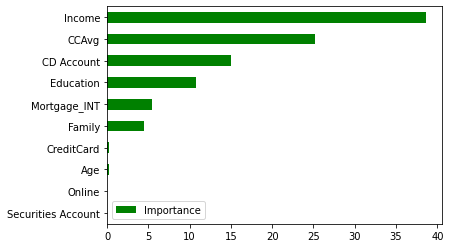

In [70]:
Importance = pd.DataFrame({'Importance':randomforest_model.feature_importances_*100}, index=train_x.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='g', )

Confusion Matrix for classifier_3

Confusion Matrix : 


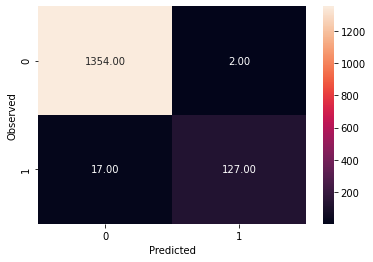

None


In [71]:
print("Confusion Matrix : ")
print(draw_cm(np_test_y,pred_3_test_x))

In [72]:
print("Mean Absolute Error : ", metrics.mean_absolute_error(np_test_y,pred_3_test_x))
print("R2 Score : ",metrics.r2_score(np_test_y,pred_3_test_x))

Mean Absolute Error :  0.012666666666666666
R2 Score :  0.8540437561455261


In [73]:
print(classification_report(np_test_y,pred_3_test_x))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1356
           1       0.98      0.88      0.93       144

    accuracy                           0.99      1500
   macro avg       0.99      0.94      0.96      1500
weighted avg       0.99      0.99      0.99      1500



**OBSERVATION** :

In Randon Forest, we have got 99% accuracy score which is BEST TILL NOW, And also, any model can not be accurate as 100% so, this could be our best model,  but still we are going to apply some more model.


**K-Nearest Neighbors** : 

The KZNearest Neighbors algorithm is a non-parametric method proposed by Thomas Cover used for classification and regression.

In [74]:
classifier_4= KNeighborsClassifier(n_neighbors= 21 , weights = 'uniform', metric='euclidean')
classifier_4.fit(np_train_x, np_train_y)    
y_pred = classifier_4.predict(np_test_x)
print("Accuracy for test data : ",metrics.accuracy_score(np_test_y,y_pred))
print("Accuracy for train data : ",metrics.accuracy_score(np_train_y,classifier_4.predict(np_train_x)))

Accuracy for test data :  0.946
Accuracy for train data :  0.9445714285714286


Confusion Matrix for classifier-4

Confusion Matrix : 


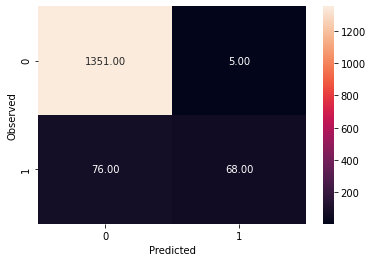

None


In [76]:
print("Confusion Matrix : ")
print(draw_cm(np_test_y,y_pred))

In [77]:
print("Mean Absolute Error : ", metrics.mean_absolute_error(np_test_y,y_pred))
print("R2 Score : ",metrics.r2_score(np_test_y,y_pred))

Mean Absolute Error :  0.054
R2 Score :  0.3777654867256637


Classification Report :

In [78]:
print(classification_report(np_test_y,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1356
           1       0.93      0.47      0.63       144

    accuracy                           0.95      1500
   macro avg       0.94      0.73      0.80      1500
weighted avg       0.95      0.95      0.94      1500



In K-Nearest Neighbors, we got the accuracy score of 95% which is nearly similar to our Logistic Regression Model, but still this is less accurate than Random Forest.

**Naive Bayes** : 

Naive Bayes classifiers are a collection of classification algorithms based on Bayes' Theorem. It is not a single algorithm but a family of algorithms where all of them share a common principle, i.e. every pair of features being classified is independent of each other.

Bayes Theorem is stated as :

P(class|data) = (P(data|class) + P(class)) / P(data)

where P(class|data) is the probablity of class given class and provided data

In [79]:
classifier_5.fit(np_train_x, np_train_y)

y_pred = classifier_5.predict(np_test_x)
print("Accuracy for test data : ",metrics.accuracy_score(np_test_y,y_pred))
print("Accuracy for train data : ",metrics.accuracy_score(np_train_y,classifier_5.predict(np_train_x)))

Accuracy for test data :  0.9133333333333333
Accuracy for train data :  0.9085714285714286


Confusion Matrix for classifier-5

Confusion Matrix : 


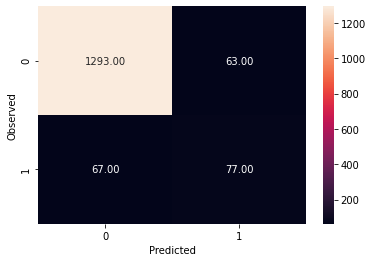

None


In [80]:
print("Confusion Matrix : ")
print(draw_cm(np_test_y,y_pred))

In [81]:
print("Mean Absolute Error : ", metrics.mean_absolute_error(np_test_y,y_pred))
print("R2 Score : ",metrics.r2_score(np_test_y,y_pred))

Mean Absolute Error :  0.08666666666666667
R2 Score :  0.0013520157325466187


classification report

In [82]:
print(classification_report(np_test_y,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1356
           1       0.55      0.53      0.54       144

    accuracy                           0.91      1500
   macro avg       0.75      0.74      0.75      1500
weighted avg       0.91      0.91      0.91      1500



**OBSERVATION** :

In Naive Bayes, we have got the score of 91% which is WORSE SCORE TILL NOW, so still our best model is Random Forest


**NEURAL NETWORK :** 

A neural network is trained by adjusting neuron input weights based on the network's performance on example inputs. If the network classifies an image correctly, weights contributing to the correct answer are increased, while other weights are decreased.

In [85]:
classifier_6.fit(np_train_x,np_train_y)
y_pred=classifier_6.predict(np_test_x)
print("Accuracy for test data : ",metrics.accuracy_score(np_test_y,y_pred))
print("Accuracy for train data : ",metrics.accuracy_score(np_train_y,classifier_6.predict(np_train_x)))

Accuracy for test data :  0.9793333333333333
Accuracy for train data :  0.9897142857142858


Confusion matrix for classifier_6

Confusion Matrix : 


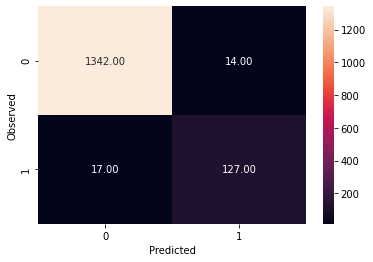

None


In [86]:
print("Confusion Matrix : ")
print(draw_cm(np_test_y,y_pred))

In [87]:
print("Mean Absolute Error : ", metrics.mean_absolute_error(np_test_y,y_pred))
print("R2 Score : ",metrics.r2_score(np_test_y,y_pred))

Mean Absolute Error :  0.020666666666666667
R2 Score :  0.7618608652900688


Classification Report

In [88]:
print(classification_report(np_test_y,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.90      0.88      0.89       144

    accuracy                           0.98      1500
   macro avg       0.94      0.94      0.94      1500
weighted avg       0.98      0.98      0.98      1500



**OBSERVATION** :

In, Neural Network, the accuracy score is 98% which is very good and also nearly similar to out Decission Tree model, but at the END we have Random Forest to be the Best Model for our DATA FRAME.


# **CONCLUSION :**

---

As from first step we had imported some important libraries that we have used for our Data Frame understanding, cleanig the noise from our data, normalise or clean the data and also used about 6 Models to find the accuracy for the coustomers who can take Personal Loan from our Bank, and we have found that Random Forest comes out to be the best model out of 6 model that we have applied with the accuracy score of 99% which is far better than other model and also we have the worse accuracy of 91% that is from our Naive Bayes model. 

And some important observations that we have found in our model, for the prediction of coustomers who can take Personal Loan from our Bank, i.e. :
1. we observed that, there were two column, ID and ZIP code that was not contributing in our model, but ZIP code could contribute, but as we Know that, they are some random picked values so, it could ruin our model. So, we have dropped ID and ZIP code as well.

2. we observed that, Experience and Age are 98% coorelated so, we has to drop one out of both, and also we got some negative values from Experience column that we need to fix and after that we decided to drop Experience column, beccause it might create noise in data.

3. we also observed that, CCAvg and Income column data was right skewed so we had to Normalise the data, so we have used yeo-johnson method from Power Transformation to Normalise our data, and Mortgage column was also right skewed so we have used Binning method to Normalise our data, because we got too much noisy data but we could not drop it because it was related to the people who have taken Personal Loan before.

SO, that was the end of data understanding and normalising it. Now, we had to move to the main part of our model that was spliting the data into 70:30 ratio 70% data to the train set and 30% data to test set, and after that its time to apply some models to predict which coustomers of our bank can take Personal Loan, so we used 6 models to find the same i.e.
1. Logistic Regression - Accuracy Score - 95%
2. Decision Tree - Accuracy Score - 98%
3. Random Forest - Accuracy Score - 99%
4. K-Nearest neighbour - Accuracy Score -95%
5. Naives Bayes - Accuracy Score - 91%
6. Neural Network - Accuracy Score - 98%

and, the best model was Random Forest with accuracy score of 99% and also, Decision Tree and Neural Network was very good and very close to the Random Forest model.
Further more details of our models is given below.



---

**-->Details of all our model applied above for Prediction of persons who will take Personal Loan from our Bank.**


**1. Logistic Regression**

Accuracy for train data : 0.9569 

Accuracy for test data : 0.9547

Mean Absolute Error : 0.04533333333333334 

R2 Score : 0.477630285152409

Consusion Matrix : 

[[1338  , 18]

 [  50  , 94]]

 Classification Report :

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1356
           1       0.84      0.65      0.73       144

    accuracy                           0.95      1500

   macro avg    -   0.90     , 0.82  ,    0.85  ,    1500

weighted avg    -   0.95    ,  0.95   ,   0.95  ,    1500

---




**2. Decision Tree**

Accuracy for train data : 0.9957 

Accuracy for test data : 0.9813 

Mean Absolute Error : 0.018666666666666668 

R2 Score : 0.7849065880039331

Confusion Matrix : 

[[1342  , 14]

 [  14 , 130]]

Classification Report :

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.90      0.90      0.90       144

    accuracy                           0.98      1500

   macro avg    -   0.95   ,   0.95  ,    0.95    ,  1500

weighted avg    -   0.98      0.98   ,   0.98   ,   1500



---



**3. Random Forest**

Accuracy for train data : 0.9949 

Accuracy for test data : 0.9873

Mean Absolute Error : 0.012666666666666666 

R2 Score : 0.8540437561455261

Confusion Matrix : 

[[1354   , 2]

 [  17  ,127]]

 Classification Report :

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1356
           1       0.98      0.88      0.93       144

    accuracy                           0.99      1500
    
   macro avg    -   0.99    ,  0.94  ,    0.96  ,    1500

weighted avg    -   0.99  ,    0.99  ,    0.99   ,   1500


---





**4. K-Nearest Neighbors**

Accuracy for test data : 0.946

Accuracy for train data : 0.9445714285714286

Mean Absolute Error : 0.054 

R2 Score : 0.3777654867256637

Confusion Matrix : 

[[1351   , 5]

 [  76  , 68]]

Classification Report :

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1356
           1       0.93      0.47      0.63       144

    accuracy                           0.95      1500

   macro avg    -   0.94   ,   0.73  ,    0.80   ,   1500

weighted avg     -  0.95   ,   0.95   ,   0.94   ,   1500


---

**5. Naive Bayes**

Accuracy for test data : 0.9133333333333333 

Accuracy for train data : 0.9085714285714286

Mean Absolute Error : 0.08666666666666667 

R2 Score : 0.0013520157325466187

Confusion Matrix : 

[[1293  , 63]

 [  67  , 77]]

 Classification Report :


              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1356
           1       0.55      0.53      0.54       144

    accuracy                           0.91      1500

   macro avg    -   0.75   ,   0.74    ,  0.75   ,   1500

weighted avg     -  0.91   ,   0.91    ,  0.91  ,    1500

---


**6. NEURAL NETWORK**

Accuracy for test data : 0.98 

Accuracy for train data : 0.99

Mean Absolute Error : 0.02 

R2 Score : 0.7695427728613569

Confusion Matrix : 

[[1346  , 10]

 [  17  ,127]]

 Classification Report :
 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.90      0.90      0.90       144

    accuracy                           0.98      1500

   macro avg    -   0.94   ,   0.94   ,   0.94  ,    1500

weighted avg     -  0.98   ,   0.98   ,   0.98  ,    1500

---